In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

- number_of_vehicles_involved
- witnessses

In [10]:
#lets take a look at the data, fraud vs non fraud as it relates to number of vehicles involved
df = pd.read_csv('insurance_claims_cleaned_fixed.csv')


In [13]:
df.groupby('fraud_reported')['number_of_vehicles_involved'].value_counts(normalize=True)

fraud_reported  number_of_vehicles_involved
No              1                              0.594954
                3                              0.350598
                2                              0.027888
                4                              0.026560
Yes             1                              0.538462
                3                              0.380567
                4                              0.044534
                2                              0.036437
Name: proportion, dtype: float64

In [9]:
counts = df.groupby(['fraud_reported'])['number_of_vehicles_involved'].value_counts()
print(counts)

fraud_reported  number_of_vehicles_involved
No              1                              448
                3                              264
                2                               21
                4                               20
Yes             1                              133
                3                               94
                4                               11
                2                                9
Name: count, dtype: int64


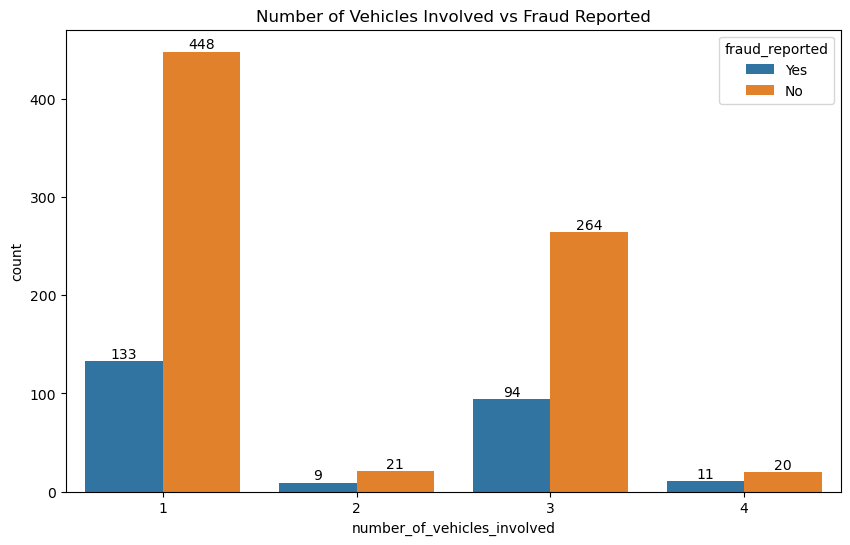

In [16]:
plt.figure(figsize = (10,6))

ax = sns.countplot(data = df, x = 'number_of_vehicles_involved', hue = 'fraud_reported')
plt.title('Number of Vehicles Involved vs Fraud Reported')

#add counts
for container in ax.containers:
    ax.bar_label(container)

Summary: Both fraudulent and non-fraudulent claims are overwhelmingly concentrated in either single vehicle or 3-vehicle incidents (around 92-94% of all cases).

The differences between fraud and non-fraud are actually quite small:

Non-fraud cases are slightly more likely to be single vehicle
Fraud cases are slightly more likely to involve 3 vehicles
But both follow the same basic pattern

In [17]:
df.groupby(['fraud_reported'])['witnesses'].value_counts(normalize=True)

fraud_reported  witnesses
No              0            0.264276
                1            0.258964
                3            0.243028
                2            0.233732
Yes             2            0.299595
                1            0.255061
                3            0.242915
                0            0.202429
Name: proportion, dtype: float64

In [18]:
counts = df.groupby(['fraud_reported'])['witnesses'].value_counts()
print(counts)

fraud_reported  witnesses
No              0            199
                1            195
                3            183
                2            176
Yes             2             74
                1             63
                3             60
                0             50
Name: count, dtype: int64


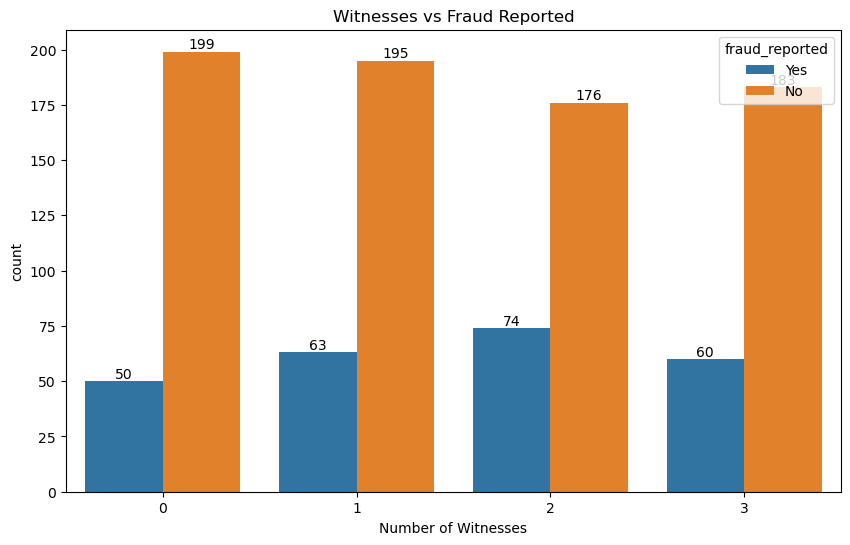

In [20]:
plt.figure(figsize = (10,6))
ax = sns.countplot(data = df, x = 'witnesses', hue = 'fraud_reported')
plt.title('Witnesses vs Fraud Reported')
plt.xlabel('Number of Witnesses')

for container in ax.containers:
    ax.bar_label(container)

Fraudulent claims tend to avoid "no witnesses" scenarios (20.2% vs 26.4%)

Fraudulent claims favor having exactly 2 witnesses (30.0% vs 23.4%)

This could suggest fabricated credibility - fraudsters may think having witnesses (especially 2) makes their claim more believable
Zero witnesses might seem suspicious to fraudsters, so they avoid this scenario


Hypothesis: Fraudsters may be strategically including witnesses in their fabricated claims to appear more legitimate, with 2 witnesses being seen as the "sweet spot" - enough to be credible but not so many as to complicate the story.